In [99]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [100]:
data=pd.read_csv("NIFTY 50_day.csv")
data["date"]=pd.to_datetime(data["date"])
data.set_index("date", inplace=True)
print(data.head(2))

               open    high      low   close  volume
date                                                
2015-01-01  8272.79  8294.7  8248.75  8284.0       0
2015-01-02  8288.70  8410.6  8288.70  8395.4       0


In [101]:
df=data[["close"]].values
print(df.shape)

(2741, 1)


In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)
window_size=10
x=[]
y=[]
for i in range(window_size,len(df)):
    x.append(df[i-window_size:i,0])
    y.append(df[i,0])
x=np.array(x)
y=np.array(y)
print(y[:5])
split = int(len(x) * 0.8)
x_train = x[:split]
x_test  = x[split:]
y_train = y[:split]
y_test  = y[split:]
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

[-1.05444993 -1.05103437 -1.04463172 -1.01949638 -1.01361586]


In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras import layers, regularizers
model = Sequential()
model.add(LSTM(units=128, input_shape=(x_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
69/69 [==============================] - 2s 6ms/step - loss: 0.0363
Epoch 2/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 3/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 4/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 5/100
69/69 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 6/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 7/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 8/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 9/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 10/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 11/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 12/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 13/100
69/69 [=================

In [138]:
from sklearn.metrics import mean_squared_error
y_tr=model.predict(x_train)
print(mean_squared_error(y_tr,y_train))
y_tr=y_tr.reshape(-1,1)
xcharizard1=sc.inverse_transform(y_tr)

69/69 [==============================] - 0s 3ms/step
0.00047006890844029155


In [139]:
y_te=model.predict(x_test)
print(mean_squared_error(y_te,y_test))
y_tr=y_te.reshape(-1,1)
xcharizard2=sc.inverse_transform(y_te)

18/18 [==============================] - 0s 3ms/step
0.0018071922110469082


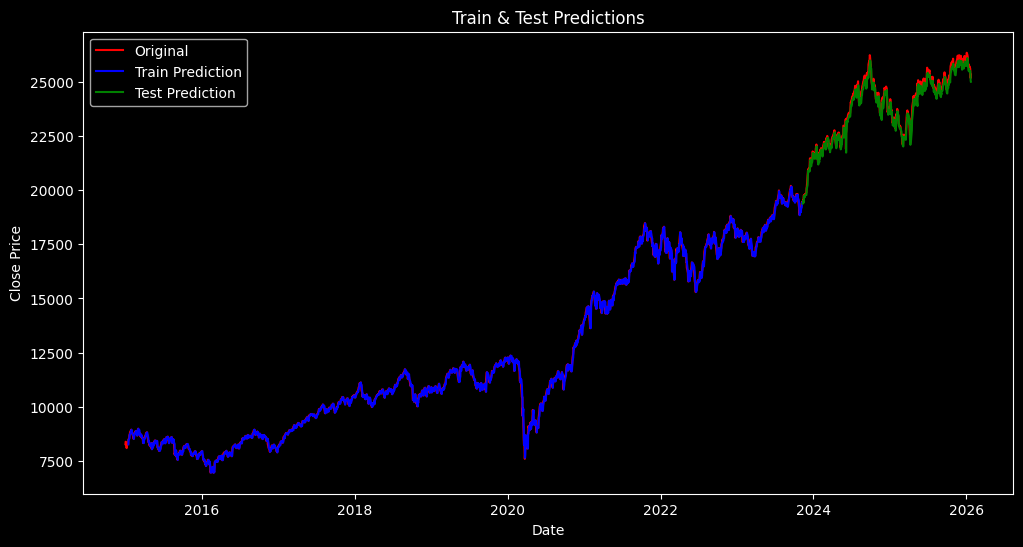

In [140]:
window_size = 10
split = int(len(y) * 0.8)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

# Plot full original close price
plt.plot(data.index, data["close"], color="red", label="Original")
plt.plot(
    data.index[window_size:window_size+split],
    xcharizard1,
    color="blue",
    label="Train Prediction"
)

# Plot test predictions
plt.plot(
    data.index[window_size+split:window_size+split+len(xcharizard2)],
    xcharizard2,
    color="green",
    label="Test Prediction"
)


plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.title("Train & Test Predictions")
plt.show()

